<img alt="Colaboratory logo" width="15%" src="https://github.com/pedrohmpaiva/portfolio/blob/main/banner.png?raw=true">

*por: [Pedro Henrique M. Paiva](https://www.linkedin.com/in/pedro-henrique-paiva/)*  

---

# Churn Prediction para uma empresa de telecomunicações

Neste projeto, surgerido pelo curso [DSNP - Sigmoidal](https://sigmoidal.ai/), serão usados dados de uma empresa de telecomunicações. Onde a *feature* alvo, dentre todas as outras, indica se aquele cliente cancelou sua assinatura ou não.

##  O que é Churn?

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes. Para calcular o churn, basta dividir a quantidade de clientes que perdeu até o final do período pelo total de clientes que iniciaram. Exemplo: se você perdeu 10 clientes de 100 = 10% de churn rate.

Entender por que seus clientes abandonam o seu produto ou serviço é vital para conquistar um crescimento sustentável. 

<p align=center>
<img src="https://img.freepik.com/premium-photo/businessman-holding-product-service-evaluation-sheet-customer-satisfaction-concept_50039-1914.jpg?w=1380" width="60%"></p>

A métrica é de extrema importância para a administração e sua análise ao longo do tempo e pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.


O projeto irá percorrer por meio de uma análise de dados, afim de fornecer alguns insights e entender em que período ocorre o problema e quais estratérgias poderiam ser adotadas para sanar eles e também o treinamento de um algoritmo de Inteligência Artificial para prever potenciais clientes que podem cancelar sua assinatura com a empresa.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/?mhsrc=ibmsearch_a&mhq=churn). O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

---
<center><b><u> DICIONÁRIO DE VARIÁVEIS </u></b></center>

 
| Coluna | Descrição |
| :- | -: |
| **customerID** | Um ID exclusivo que identifica cada cliente. |
| **gender** | Gênero do cliente: Masculino ou Feminino. |
| **SeniorCitizen** | Indica se o cliente tem 65 anos de idade ou mais. |
| **Partner** | Indica se o cliente é casado. |
| **Dependents** | Indica se o cliente mora com algum dependente. Os dependentes podem ser filhos, pais, avós, etc. |
| **tenure** | Indica a quantidade total de meses que o cliente está na empresa. |
| **PhoneService** | Indica se o cliente assina o serviço de telefonia residencial com a empresa. |
| **MultipleLines** | Indica se o cliente assina várias linhas telefônicas com a empresa. |
| **InternetService** | Indica se o cliente assina serviço de Internet com a empresa. |
| **OnlineSecurity** | Indica se o cliente assina um serviço de segurança online adicional fornecido pela empresa. |
| **OnlineBackup** | Indica se o cliente assina um serviço de backup online adicional fornecido pela empresa. |
| **DeviceProtection** | Indica se o cliente assina um plano adicional de proteção de dispositivos para seus equipamentos de Internet fornecidos pela empresa. |
| **TechSupport** | Se o cliente tem suporte técnico ou não. |
| **StreamingTV** | Indica se o cliente usa seu serviço de Internet para transmitir programação de televisão de um provedor terceirizado. |
| **StreamingMovies** | Indica se o cliente usa seu serviço de Internet para transmitir filmes de um provedor terceirizado. |
| **Contract** | Indica o tipo de contrato atual do cliente: mês a mês, um ano, dois anos. |
| **PaperlessBilling** | Indica se o cliente optou pelo faturamento sem papel |
| **PaymentMethod** | Indica como o cliente paga sua conta: Saque bancário, cartão de crédito, cheque enviado |
| **MonthlyCharges** | Indica a cobrança mensal total atual do cliente para todos os seus serviços da empresa. |
| **TotalCharges** | O valor total cobrado do cliente. Calculados até o final do trimestre especificado |
| **Churn** | Se o cliente se desligou ou não |


---

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importando os pacotes necessários

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import mean_squared_error, mean_absolute_error
from sklearn.tree            import DecisionTreeClassifier, plot_tree
from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model    import SGDClassifier
from sklearn.metrics         import precision_score, recall_score, accuracy_score, f1_score
from sklearn                 import metrics
from sklearn.pipeline        import make_pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost                 import XGBClassifier

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import SMOTE

In [3]:
#Cores que usarei no projeto

preto_titulo = '#363434'
preto_elementos = '#5c5757'
azul_escuro = '#0F228C'
azul_claro = '#05d3f8'
cinza = '#efecec'
verde = '#91be95'


In [4]:
# importando os dados

DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

#Para exibir todas as features para uma annálise mais ampla
pd.set_option('display.max_columns', None)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Análise exploratória

In [5]:
#Informações iniciais sobre todo o conjunto de dados

df.info()
print('\n\nDimensão do dataframe: {}'.format(df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# A princípio sem valores ausentes

print('****Valores Ausentes**** \n{}' .format(df.isnull().sum()))

****Valores Ausentes**** 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
print("****Valores únicos (por coluna)****\n{}".format(df.nunique()))

****Valores únicos (por coluna)****
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Mudando o tipo - TotalCharges
Preciso converter para "int" ou "float" a coluna: TotalCharges. Apenas ela está como 'object', porém ela contém números.

Para isto irei usar o método **to_numeric( )**. O método **to_numeric( )** automaticamente muda o tipo da coluna para os valores que ele encontrar na mesma, seja inteiro ou um *float*.

Encontrei erros em algumas linhas (11 para ser preciso), que ao invés de um número, foi preenchido apenas com um espaço em branco " ". Então, passarei o argumento existente no método **to_numeric( )**, chamado "coerce", que ao encontrar algum erro (ou seja, algo diferente de um número), transforma aquilo em um valor nulo (NaN). Depois posso preencher estes valores com a mediana ou média da coluna para evitar a exclusão desses dados. Quero evitar a exclusão deles pois todas as outras features estão corretamente preenchidas.
 

In [10]:
#Fazendo uma cópia do DataFrame antes de qualquer alteração

df2 = df.copy()

In [11]:
#Aplicando o to_numeric()

df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')

In [12]:
#Verificando se a alteração do tipo foi feita

df2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# Verificando se há valores nulos

df2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#Valores antes do to_numeric() - Apenas as linhas que estão com espaços em branco
# ** Atenção especial para a feature TotalCharges**

indice = df2[df2['TotalCharges'].isnull()].index
df.loc[indice]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
#Valores depois do to_numeric()
# ** Atenção especial para a feature TotalCharges**

df2[df2['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Ao observar estes valores faltantes, vejo que todos eles pertencem a classe *"Churn = No"*. Para preenchê-los irei usar a média encontrada somente nesta classe, ou seja, ao invés de simplesmente usar a média equivalente de toda a coluna TotalCharges, usarei somente a média encontrada nesta classe.

In [16]:
#Substituindo os valores nulos pela média da coluna TotalCharges.

df2['TotalCharges'].fillna(df2.query('Churn == "No"')['TotalCharges'].mean(), inplace= True)

In [17]:
#Verificando as alterações

df2.loc[indice]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2555.344141,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2555.344141,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2555.344141,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2555.344141,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2555.344141,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2555.344141,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2555.344141,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2555.344141,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2555.344141,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2555.344141,No


# Visualizando os dados

In [18]:
# Verificando as estatísticas descritivas de todo o Dataset

df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.725328
std,0.368612,24.559481,30.090047,2265.025738
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
# Verificando a correlação das variáveis

df2.corr().style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102311
tenure,0.016567,1.000000,0.247900,0.824501
MonthlyCharges,0.220173,0.247900,1.000000,0.650315
TotalCharges,0.102311,0.824501,0.650315,1.000000


A correlação do dataframe não me forneceu tantos insights

In [20]:
# Verificando a taxa de Churn durante todo o período

no, yes = df2['Churn'].value_counts()['No'], df2['Churn'].value_counts()['Yes']

In [21]:
print("Porcentagem de churn durante todo o período: %.2f" % (no / yes))

Porcentagem de churn durante todo o período: 2.77


## Visualizando os dados - Boxplot

O boxplot nos mostra visualmente a distribuição e outliers (valores discrepantes) dos dados.

Text(0.5, 0, 'Valor ($)')

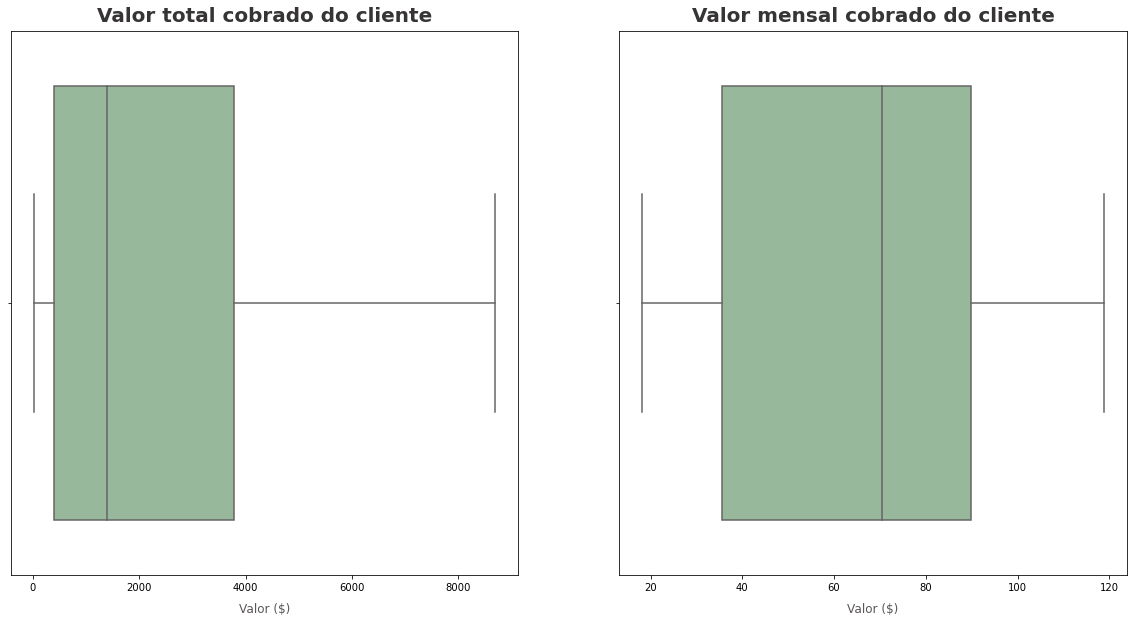

In [22]:
fig, ax = plt.subplots(ncols= 2 ,figsize=(20, 10))

sns.boxplot(x = 'TotalCharges',data = df2, ax= ax[0], color= verde)
ax[0].set_title('Valor total cobrado do cliente', fontsize = 20, 
                color = preto_titulo, fontweight= 'bold', pad = 10)

ax[0].set_xlabel('Valor ($)', labelpad= 10, fontsize = 12, color = preto_elementos)

######################################################################################

sns.boxplot(x = 'MonthlyCharges',data = df2, ax= ax[1], color = verde)
ax[1].set_title('Valor mensal cobrado do cliente', fontsize = 20, 
                color = preto_titulo, fontweight= 'bold', pad = 10)

ax[1].set_xlabel('Valor ($)', labelpad= 10, fontsize = 12, color = preto_elementos)

Verifico que não existem outliers presentes nestas duas features

## Visualizando os dados - Evasão de clientes

Um bom insight que podemos tirar logo inicialmente que pode nos fornecer informações importantes, é verificando a coluna ***tenure*** combinada com a coluna ***Churn***.
Como dito anteriormente ***tenure*** indica a quantidade total de meses que o cliente está na empresa. Com isto podemos plotar um gráfico que mostre quantos clientes, a cada mês, permanece com os serviços contratados da empresa e quantos cancelam.

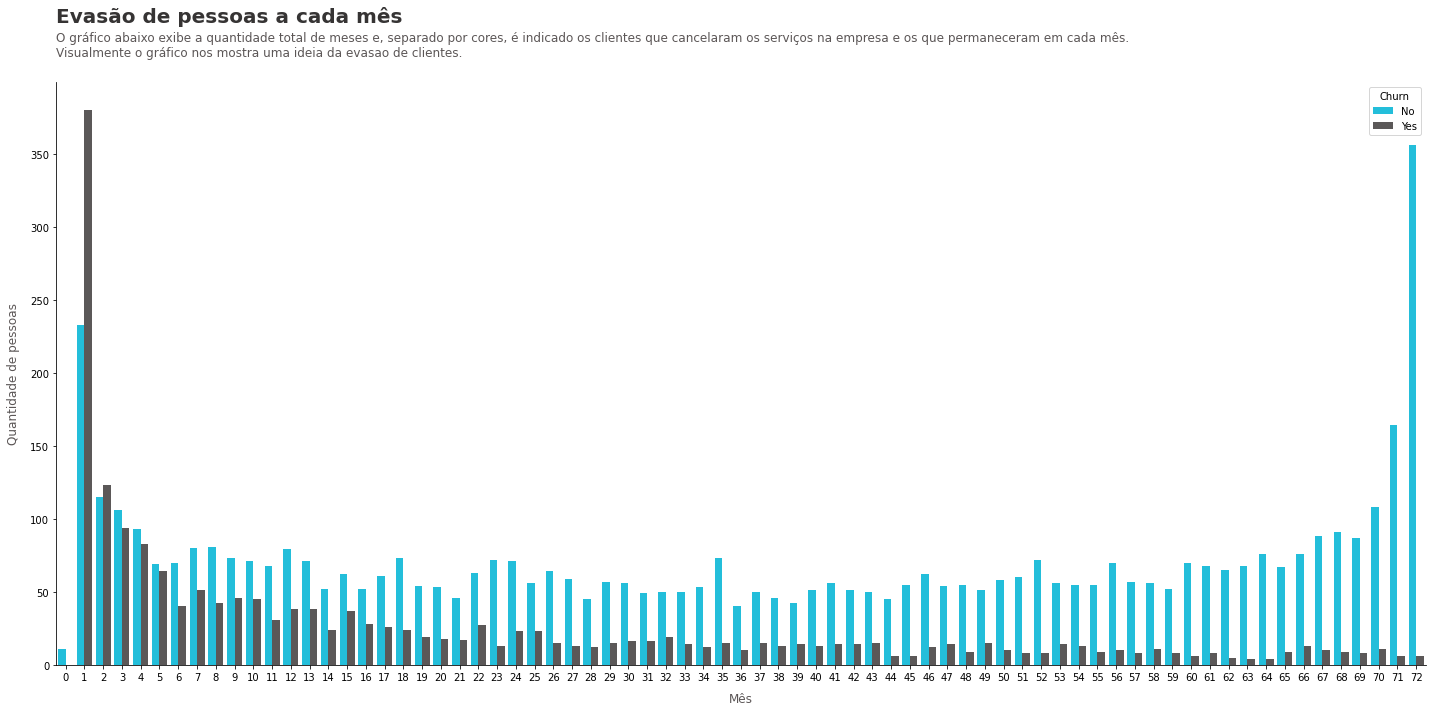

In [23]:
# Evasão de pessoas

fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.countplot(x="tenure", hue="Churn", data=df2, palette=[azul_claro, preto_elementos])

ax.set_title('Evasão de pessoas a cada mês', fontsize = 20,
             color = preto_titulo,
             loc = 'left', 
             pad= 60, 
             fontweight= 'bold')

ax.text(-0.5, 417, 'O gráfico abaixo exibe a quantidade total de meses e, separado por cores, é indicado os clientes que cancelaram os serviços na empresa e os que permaneceram em cada mês.\nVisualmente o gráfico nos mostra uma ideia da evasao de clientes.',
        color = preto_elementos, fontsize = 12)

ax.set_ylabel('Quantidade de pessoas', labelpad= 10, fontsize = 12, color = preto_elementos)

ax.set_xlabel('Mês', labelpad = 10, fontsize = 12, color = preto_elementos)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.tight_layout()

---
Porém, é o suficiente? Será que, por mais que mais clientes permaneçam por mês, isto é um sinônimo de lucro para a empresa? 


## Visualizando os dados - Receita mensal

A *feature* ***MonthlyCharges*** indica a cobrança mensal total do cliente, de todos os serviços contratados.

Então, ao combinarmos novamente as colunas ***tenure*** e ***Churn***, separados por *Churn - Yes* e *Churn - No*, somando os valores mensais contidos na coluna ***MonthlyCharges***, nos é retornado um balanço de quanto de receita foi gerada e quanto de receita foi perdida em cada mês

In [24]:
#Salvando em listas todos os valores somados por mês e os dividindo por Churn - Yes e Churn - No

temporarioYes = []
temporarioNo = []
for i in np.array(range(73)):
    temporarioYes.append((df2.query(f'Churn == "Yes" & tenure == {i}')['MonthlyCharges'].sum()))
    temporarioNo.append((df2.query(f'Churn == "No" & tenure == {i}')['MonthlyCharges'].sum()))

In [25]:
#Criando um dataframe com os valores de todo o periodo. Separado pelas colunas Churn_Yes e Churn_No

valores_mensais = pd.DataFrame(zip(temporarioYes, temporarioNo), columns= ['Churn_Yes', 'Churn_No'])
valores_mensais

,Churn_Yes,Churn_No
0,0.00,455.60
1,22115.00,8832.80
2,8108.70,5506.40
3,6205.00,5398.00
4,5862.75,4245.40
...,...,...
68,882.05,6450.05
69,795.60,5932.60
70,1074.10,8015.00
71,570.80,11964.25


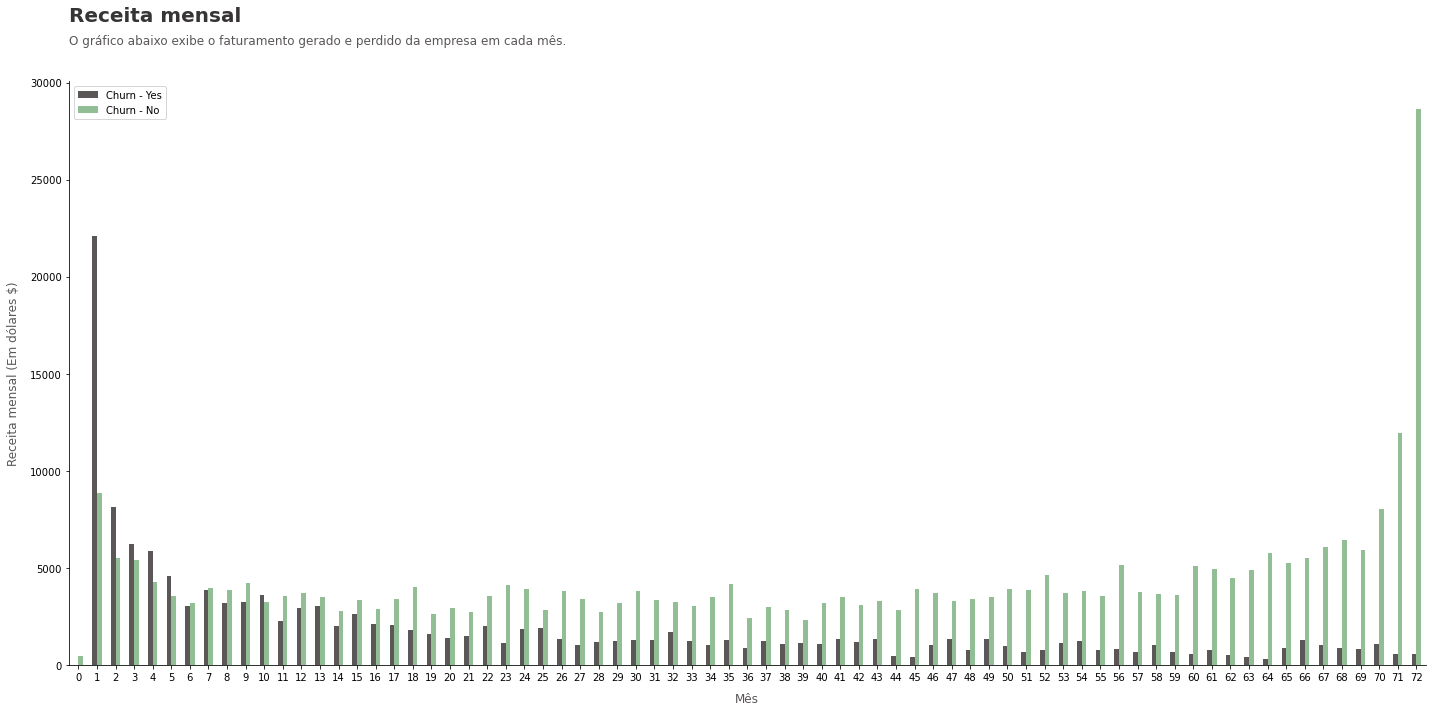

In [26]:
# Plotando - Valores Mensais

fig, ax = plt.subplots(figsize=(20, 10))

valores_mensais.plot(kind = 'bar',color = [preto_elementos, verde], ax = ax)

ax.set_xlabel('Mês', labelpad= 10, fontsize = 12, color = preto_elementos)
ax.set_ylabel('Receita mensal (Em dólares $)', labelpad= 10, fontsize = 12, color = preto_elementos)
labels = ['Churn - Yes', 'Churn - No']
ax.legend(labels)


ax.set_title('Receita mensal', fontsize = 20,
             color = preto_titulo,
             loc = 'left', 
             pad= 60, 
             fontweight= 'bold')
             
ax.text(-0.5, 32000, 'O gráfico abaixo exibe o faturamento gerado e perdido da empresa em cada mês.',
        color = preto_elementos, fontsize = 12)

ax.spines[['top', 'right']].set_visible(False)


plt.xticks(rotation = 0)
plt.tight_layout()

---
Aqui podemos ver claramente que nos primeiros 5 meses, a empresa fica com uma receita negativa.


## Visualizando os dados - Evasão de clientes X Receita

A título de comparação, irei juntar os dois plots que fiz anteriormente e ver quais informações podemos extrair desta visualização

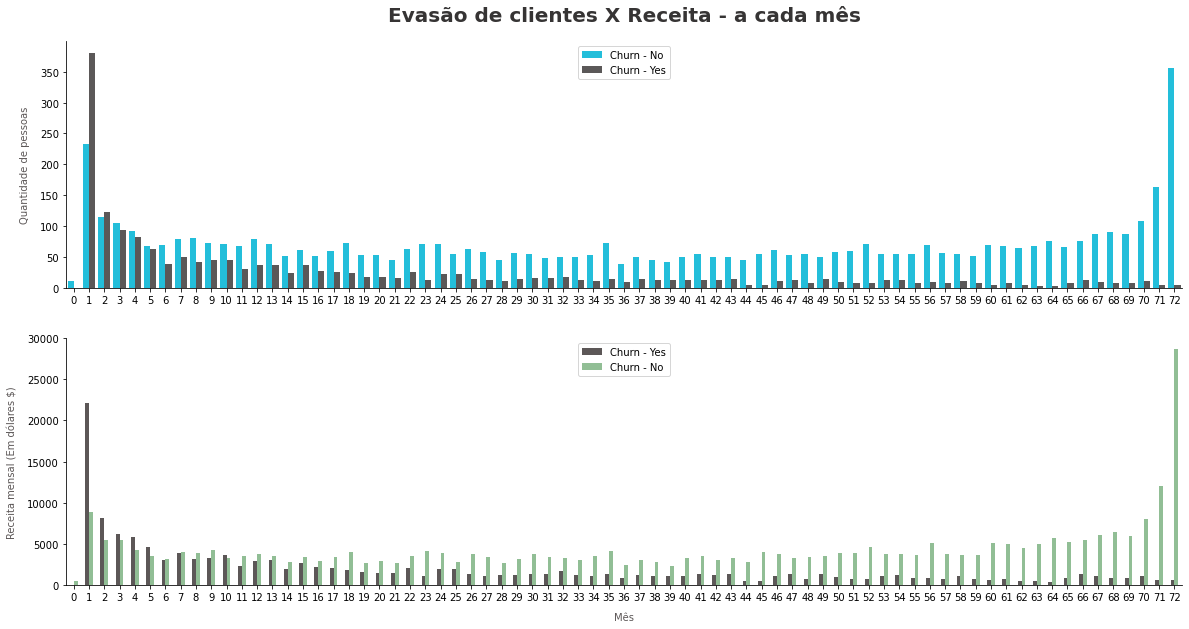

In [27]:
fig, ax = plt.subplots(nrows= 2, figsize=(20, 10))


sns.countplot(x="tenure", hue="Churn", data=df2, palette=[azul_claro, preto_elementos], ax=ax[0])

ax[0].set_title('Evasão de clientes X Receita - a cada mês', fontsize = 20, pad = 20, color = preto_titulo, fontweight= 'bold')

ax[0].set_ylabel('Quantidade de pessoas', labelpad= 10, fontsize = 10, color = preto_elementos)

ax[0].set_xlabel(' ', labelpad = 10, fontsize = 10, color = preto_elementos)
ax[0].legend(['Churn - No', 'Churn - Yes'])
ax[0].spines[['top', 'right']].set_visible(False)


#############################################################################################################################


valores_mensais.plot(kind = 'bar',color = [preto_elementos, verde], ax = ax[1])

ax[1].set_xlabel('Mês', labelpad= 10, fontsize = 10, color = preto_elementos)
ax[1].set_ylabel('Receita mensal (Em dólares $)', labelpad= 10, fontsize = 10, color = preto_elementos)

labels = ['Churn - Yes', 'Churn - No']
ax[1].legend(labels, loc = 'upper center')

plt.xticks(rotation = 0)
ax[1].spines[['top', 'right']].set_visible(False)

---
Se plotarmos os dois gráficos juntos, podemos ter uma ideia melhor de que: por mais que em alguns meses, mais clientes permaneçam com os serviços contratados do que os que cancelaram, nem sempre isto quer dizer que a empresa irá ter lucro naquele período.

## Visualizando os dados - Balanceamento das classes

In [28]:
#Contando quantas ocorrências existem em cada classe

no = df2['Churn'].value_counts()[0]
yes = df2['Churn'].value_counts()[1]

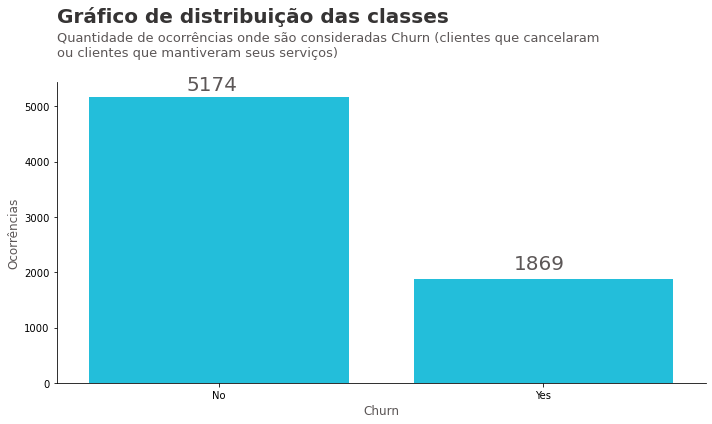

In [29]:
#Plotando um value_counts da distribuição das classes

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = df2['Churn'], color= azul_claro)

ax.set_title('Gráfico de distribuição das classes', 
             fontsize = 20, 
             color = preto_titulo, 
             loc = 'left', 
             pad= 60, 
             fontweight= 'bold')  

ax.text(-0.5,5900, 
        'Quantidade de ocorrências onde são consideradas Churn (clientes que cancelaram\nou clientes que mantiveram seus serviços)', 
        fontsize = 13, color = preto_elementos)


ax.set_xlabel('Churn',  fontsize = 12, color= preto_elementos)
ax.set_ylabel('Ocorrências', fontsize = 12, color= preto_elementos)

ax.spines['top'].set_visible(False)

ax.annotate(yes, 
            xy=(0.91, 2050), 
            color = preto_elementos, 
            fontsize= 20,
            fontweight='light')
ax.annotate(no, 
            xy=(-0.1, 5300), 
            color = preto_elementos, 
            fontsize= 20,
            fontweight='light')

ax.spines['right'].set_visible(False)

plt.tight_layout()

---
Claramente, temos um dataset bem desbalanceado. Há muito mais ocorrências de *Churn - No* do que o oposto. Será preciso adotar alguma técnica de balanceamento 

# Preparando os dados
---


## Lidando com variáveis categóricas  

In [30]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# Dicionario - criando um dataframe para salvar as variaveis categoricas

var_categ = pd.DataFrame(index= range(4))
var_categ

""
0
1
2
3


In [32]:
#Criando uma função para preencher o dataframe com os valores das variáveis categóricas

def pega_colunas(dataf, coluna):
    
    for i in coluna:
        var_categ[i] = pd.Series(dataf[i].unique())
        var_categ.fillna(' ', inplace = True)

    

In [33]:
lista_categ = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [34]:
pega_colunas(df2, lista_categ)

In [35]:
var_categ.head(10)

,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,1.0,Male,No,Yes,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,No,Mailed check
2,,,,,,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,,Bank transfer (automatic)
3,,,,,,,,,,,,,,,,Credit card (automatic)


---
Fiz isso para ter uma visualização melhor dos valores que cada variável categórica possui. Isso irá me ajudar na tomada de decisão sobre qual estratérgia adotarei.

Vendo que algumas classes possuem mais do que 2 valores, usar o LabelEncoding não é uma boa escolha. Então irei usar o One-Hot-Encoding

In [36]:
df2 = pd.get_dummies(df2, columns= lista_categ)

In [37]:
df2.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_0,SeniorCitizen_1,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [38]:
#A feature SeniorCitizen pode ter ficado confusa. Então renomeei seu nome

df2.rename(columns= {'SeniorCitizen_0' : 'SeniorCitizen_No', 'SeniorCitizen_1' : 'SeniorCitizen_Yes'}, inplace= True)

#A variável alvo estava com valores yes ou no, então substitui para 0 e 1

df2['Churn'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

In [39]:
df2.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [40]:
#Removendo a coluna customerID pois não será necessária

df2.drop(columns= 'customerID', axis= 1, inplace= True)

In [41]:
df2.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


## Balanceando o conjunto de dados

Antes de balancear o conjunto de dados, uma boa prática é que se divida o conjunto entre treino e teste. Dessa forma, você garante que o conjunto de dados de teste seja o mais imparcial possível e reflita uma avaliação verdadeira para seu modelo. 


Como é afirmado neste [artigo](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb):


``"O balanceamento dos dados antes da divisão pode introduzir viés no conjunto de teste, onde alguns pontos de dados no conjunto de teste são gerados sinteticamente e bem conhecidos do conjunto de treinamento. O conjunto de teste deve ser o mais objetivo possível."``

In [42]:
# Dividindo entre treino e teste

X = df2.drop('Churn', axis= 1)
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

Temos duas técnicas principais de balanceamento de dados: *Oversampling* e *Undersampling*. Resumidamente, o *Oversampling* aumenta as amostras da classe que tem menos ocorrências; já o *Undersampling* faz justamente o contrário, nele é reduzida as ocorrências das amostras da classe que há mais ocorrências por meio de um corte, ficando assim com o mesmo número de amostras.

Podemos usar uma ou outra e até podemos mixar as duas técnicas. Aqui, farei testes com as duas técnicas e irei aplicar em alguns algoritmos observando os resultados obtidos.

### Undersampling

In [43]:
# Capturando as variáveis de treino e aplicando o NearMiss

nm = NearMiss()
X_under_train, y_under_train = nm.fit_resample(X_train, y_train)


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

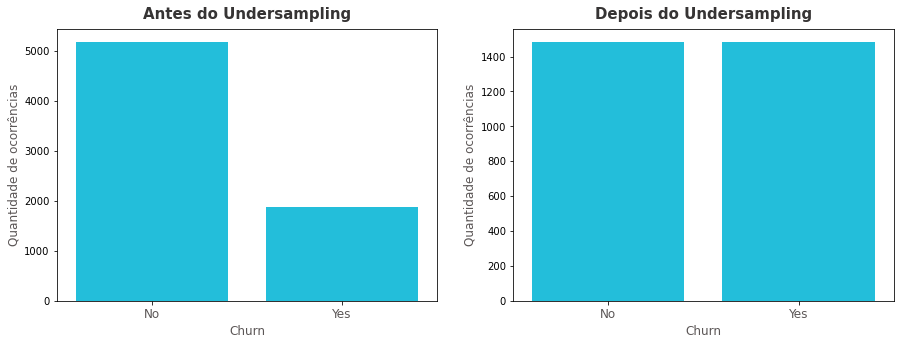

In [44]:
#Plotando um antes e depois dos dados

fig, ax = plt.subplots(ncols= 2, figsize = (15,5))


sns.countplot(y, ax = ax[0], color= azul_claro)
ax[0].set_title('Antes do Undersampling',
                fontsize = 15,
                color = preto_titulo, 
                pad= 10, 
                fontweight= 'bold')
ax[0].set_xlabel('Churn',fontsize = 12, color= preto_elementos)
ax[0].set_ylabel('Quantidade de ocorrências',fontsize = 12, color= preto_elementos)
ax[0].set_xticklabels(labels = ['No','Yes'],fontsize = 12, color= preto_elementos)


sns.countplot(y_under_train, ax = ax[1], color= azul_claro)
ax[1].set_title('Depois do Undersampling',
                fontsize = 15,
                color = preto_titulo, 
                pad= 10, 
                fontweight= 'bold')
ax[1].set_xlabel('Churn',fontsize = 12, color= preto_elementos)
ax[1].set_ylabel('Quantidade de ocorrências',fontsize = 12, color= preto_elementos)
ax[1].set_xticklabels(labels = ['No','Yes'],fontsize = 12, color= preto_elementos)



## Oversampling

In [45]:
# Instanciando e aplicando o smote nos dados de treino

smote = SMOTE()

X_over_train, y_over_train = smote.fit_resample(X_train, y_train)

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

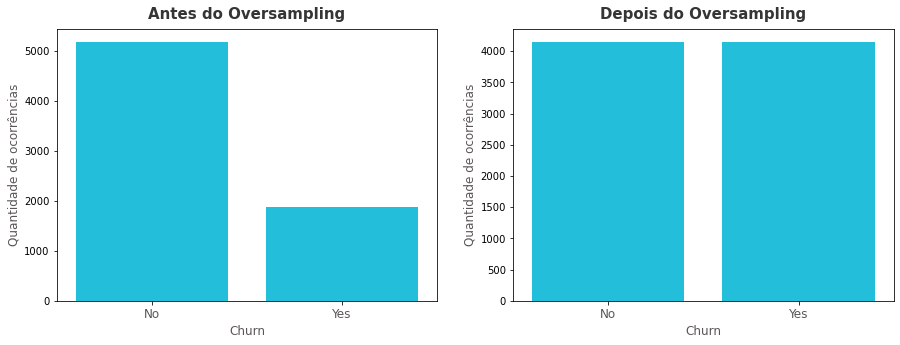

In [46]:
#Plotando um antes e depois dos dados

fig, ax = plt.subplots(ncols= 2, figsize = (15,5))


sns.countplot(y, ax = ax[0], color= azul_claro)
ax[0].set_title('Antes do Oversampling',
                fontsize = 15,
                color = preto_titulo, 
                pad= 10, 
                fontweight= 'bold')
ax[0].set_xlabel('Churn',fontsize = 12, color= preto_elementos)
ax[0].set_ylabel('Quantidade de ocorrências',fontsize = 12, color= preto_elementos)
ax[0].set_xticklabels(labels = ['No','Yes'],fontsize = 12, color= preto_elementos)


sns.countplot(y_over_train, ax = ax[1], color= azul_claro)
ax[1].set_title('Depois do Oversampling',
                fontsize = 15,
                color = preto_titulo, 
                pad= 10, 
                fontweight= 'bold')
ax[1].set_xlabel('Churn',fontsize = 12, color= preto_elementos)
ax[1].set_ylabel('Quantidade de ocorrências',fontsize = 12, color= preto_elementos)
ax[1].set_xticklabels(labels = ['No','Yes'],fontsize = 12, color= preto_elementos)



# Modelo de Machine Learning

Antes de escolher um modelo, reuni alguns algoritmos de classificação e irei treiná-los com os conjuntos de dados derivados das técnicas de balanceamento. Se houver alguma mudança nos scores, irei selecionar o conjunto de dados que os modelos obtiveram a maior pontuação.

A métrica escolhida será o *recall*. Escolhi priorizá-la com o objetivo de ser mais preciso ao acertar resultados de clientes que potencialmente irão cancelar seus serviços.

In [47]:
#Def para avaliar os modelos usando cross validation. Sem os dados estarem normalizados

def val_model(X, y, clf):

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall', cv = StratifiedKFold(n_splits= 10, shuffle= True))
    
    return scores.mean()

In [48]:
# instanciando modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()

In [49]:
#Testando com o conjunto de dados - Undersampling
model_under = []
recall_under = []
# avaliando o desempenho (recall)
for clf in (rf, dt, sgdc, lr, xgb, gbc):
    model_under.append(clf.__class__.__name__)
    recall_under.append(val_model(X_under_train, y_under_train, clf))

pd.DataFrame(data=recall_under, index=model_under, columns=['Recall'])

,Recall
RandomForestClassifier,0.651750
DecisionTreeClassifier,0.613241
SGDClassifier,0.641298
LogisticRegression,0.731117
XGBClassifier,0.680541
GradientBoostingClassifier,0.731834


In [50]:
#Testando com o conjunto de dados - Oversampling
model_over = []
recall_over = []
# avaliando o desempenho (recall)
for clf in (rf, dt, sgdc, lr, xgb, gbc):
    model_over.append(clf.__class__.__name__)
    recall_over.append(val_model(X_over_train, y_over_train, clf))

pd.DataFrame(data=recall_over, index=model_over, columns=['Recall'])

,Recall
RandomForestClassifier,0.834458
DecisionTreeClassifier,0.810120
SGDClassifier,0.821928
LogisticRegression,0.836145
XGBClassifier,0.842651
GradientBoostingClassifier,0.865060


---
Como é possível observar, tem uma boa diferença nas pontuações obtidas pelos conjuntos de dados derivados das técnicas de balanceamento. O *recall* é calculado como a razão entre o número de **amostras positivas corretamente classificadas como positivas** e **o número total de amostras positivas**. Ele mede a capacidade do modelo de detectar amostras positivas, quanto maior o recall, mais amostras positivas foram detectadas. Então, irei escolher o conjunto de dados derivado do *SMOTE*


Dado os modelos escolhidos irei escolher a *RandomForestClassifier* e o XGB.

## Ajustando os Hiperparâmetros

Primeiro irei aplicar o *RandomizedSearchCV* e a partir dos resultados obtidos, irei usá-los como base para aplicar no *GridSearchCV*. Farei com o *GridSearchCV* pequenos ajustes afim de obter uma maior pontuação.

In [51]:
# Aplicando o Standard Scaler

ss = StandardScaler()
x_train_transformed = ss.fit_transform(X_over_train)

# Usando o StratifiedKFold para dividir em partes iguais o conjunto de dados
cv = StratifiedKFold(n_splits= 10, shuffle= True)

# Dicionário contendo os hiperparâmetro que passarei no RandomizedSearchCV *ver melhor os valores

params_rf = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'min_samples_leaf' : [1,2,3,4],
    'max_features' : ['auto', 'log2', None],
    'min_samples_split' : range(2,4, 1),
    'max_depth' : [3, 5, 6],
    'criterion' : ["gini", "entropy"]  
}

params_xgb = {
    'max_depth': range(1, 5, 1),
    'n_estimators': range(10, 500, 50),
    'min_child_weight' : [0.1, 0.5, 1, 1.5, 2],
    'gamma':[i/10.0 for i in range(0,5)],
    'learning_rate':[0.001, 0.01, 0.1, 1]
}


In [52]:
#Random Search aplicado nos modelos escolhidos

resultado_rf = RandomizedSearchCV(rf, param_distributions= params_rf, scoring = 'recall', cv = cv)
resultado_xgb = RandomizedSearchCV(xgb, param_distributions= params_xgb, scoring = 'recall', cv = cv)

In [53]:
#Ajuste do modelo - Random Forest

resultado_rf.fit(x_train_transformed, y_over_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 6],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': range(2, 4),
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='recall')

In [54]:
#Ajuste do modelo - XGB

resultado_xgb.fit(x_train_transformed, y_over_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           int...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                

---
**Resultado - Melhores hiperparâmetros obtidos através do RandomSearch**

In [55]:
# Random Forest
print("Recall: {}\nPara esta combinação: {}".format(resultado_rf.best_score_, resultado_rf.best_params_))

Recall: 0.8920481927710844
Para esta combinação: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'entropy'}


In [57]:
# XGB
print("Recall: {}\nPara esta combinação: {}".format(resultado_xgb.best_score_, resultado_xgb.best_params_))

Recall: 0.8942168674698794
Para esta combinação: {'n_estimators': 210, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1}


---
Com essa primeira etapa da busca dos melhores hiperparâmetros concluída, agora com base nestes resultados iremos buscar possíveis melhorias através do *GridSearch*.

Apesar da Random Forest ter se saído melhor, ainda sim irei treinar estes dois modelos objetivando a comparação deles depois.

## XGB Classifier

Primeiro algoritmo que irei treinar é o XGBClassifier. O EXtreme Gradient Boosting, se diferencia pela sua combinação de técnicas de otimização de software e hardware para produzir resultados superiores usando menos recursos de computação no menor período de tempo. Para saber mais sobre como o XGB se diferencia dos outros algoritmos de árvore, indico este [artigo](https://www.datageeks.com.br/xgboost/)

Para saber mais sobre os hiperparâmetros contidos nele e de como podemos configurá-lo este [guia](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) da Analytics Vidhya aborda como podemos buscar a melhor cobinação e pra quê cada um deles serve.


Treinarei o algoritmo por etapas. Em um dicionário, colocarei o parâmetro juntamente de alguns valores. Posteriormente, usarei o GridSearchCV passando o algortmo junto do dicionário. Ao terminar o ajuste verificarei o melhor valor para aquele parâmetro específico. Repetirei estas etapas para todos os parâmetros que irei usar. 

In [58]:
params_xgb = {
    'min_child_weight' : [0.5, 1, 1.5, 2]
}

#Instanciando o modelo de XGBClassifier.
xgb = XGBClassifier()

# Grid Search
resultados_xgb = GridSearchCV(xgb, scoring="recall", param_grid= params_xgb, cv= cv)

#Ajuste do modelo
resultados_xgb.fit(x_train_transformed, y_over_train)

# Resultado do Grid Search
print("Recall: {}\nPara esta combinação: {}".format(resultados_xgb.best_score_, resultados_xgb.best_params_))

Recall: 0.8400000000000001
Para esta combinação: {'min_child_weight': 0.5}


In [59]:
params_xgb = {
    'n_estimators': range(100, 500, 50)
}

#Instanciando o modelo de XGBClassifier.
xgb = XGBClassifier(min_child_weight = 0.5)

# Grid Search
resultados_xgb = GridSearchCV(xgb, scoring="recall", param_grid= params_xgb, cv= cv)

#Ajuste do modelo
resultados_xgb.fit(x_train_transformed, y_over_train)

# Resultado do Grid Search
print("Recall: {}\nPara esta combinação: {}".format(resultados_xgb.best_score_, resultados_xgb.best_params_))

Recall: 0.8433734939759037
Para esta combinação: {'n_estimators': 100}


In [60]:
params_xgb = {
    'gamma':[i/10.0 for i in range(0,5)]
}

#Instanciando o modelo de XGBClassifier.
xgb = XGBClassifier(min_child_weight = 0.5, n_estimators = 100)

# Grid Search
resultados_xgb = GridSearchCV(xgb, scoring="recall", param_grid= params_xgb, cv= cv)

#Ajuste do modelo
resultados_xgb.fit(x_train_transformed, y_over_train)

# Resultado do Grid Search
print("Recall: {}\nPara esta combinação: {}".format(resultados_xgb.best_score_, resultados_xgb.best_params_))

Recall: 0.8455421686746988
Para esta combinação: {'gamma': 0.1}


In [63]:
params_xgb = {
    'learning_rate':[0.001, 0.01, 0.1, 1]
}

#Instanciando o modelo de XGBClassifier.
xgb = XGBClassifier(min_child_weight = 0.5, n_estimators = 100, gamma = 0.1)

# Grid Search
resultados_xgb = GridSearchCV(xgb, scoring="recall", param_grid= params_xgb, cv= cv)

#Ajuste do modelo
resultados_xgb.fit(x_train_transformed, y_over_train)

# Resultado do Grid Search
print("Recall: {}\nPara esta combinação: {}".format(resultados_xgb.best_score_, resultados_xgb.best_params_))

Recall: 0.8771084337349396
Para esta combinação: {'learning_rate': 0.01}


In [64]:
params_xgb = {
    'max_depth': range(1, 5, 1)
}

#Instanciando o modelo de XGBClassifier.
xgb = XGBClassifier(min_child_weight = 0.5, n_estimators = 100, gamma = 0.1, learning_rate = 0.01)

# Grid Search
resultados_xgb = GridSearchCV(xgb, scoring="recall", param_grid= params_xgb, cv= cv)

#Ajuste do modelo
resultados_xgb.fit(x_train_transformed, y_over_train)

# Resultado do Grid Search
print("Recall: {}\nPara esta combinação: {}".format(resultados_xgb.best_score_, resultados_xgb.best_params_))

Recall: 0.9033734939759037
Para esta combinação: {'max_depth': 3}


---
**Resultado - Melhores hiperparâmetros obtidos através do GridSearchCV**

In [66]:
xgb = XGBClassifier(min_child_weight = 0.5, n_estimators = 100, gamma = 0.1, learning_rate = 0.01, max_depth = 3)

In [67]:
# Exibindo a validação cruzada usando o recall como score

scores = cross_val_score(xgb, x_train_transformed, y_over_train, scoring='recall', cv = StratifiedKFold(n_splits= 10, shuffle= True))
print("Recall do modelo pós configuração de hiperparâmetros(GridSearch): {}".format(scores.mean()))

Recall do modelo pós configuração de hiperparâmetros(GridSearch): 0.9040963855421686


---
Com os parâmetros definidos, chegou a hora de treiná-lo!
Uma boa prática para ajuste do modelo é o uso de uma *Pipeline*. Nela passei apenas o *StandardScaler* e o modelo que será treinado:

In [68]:
# Instanciando a pipeline e fazendo o ajuste

pipeline = make_pipeline(ss, xgb)
pipeline.fit(X_over_train, y_over_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0.1, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=0.5,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
   

In [69]:
# Fazendo a previsão com os dados de teste

y_pred = pipeline.predict(X_test)

In [70]:
print('******************** RESUMO DO MODELO - Classification Report ********************\n\n',metrics.classification_report(y_test, y_pred))

******************** RESUMO DO MODELO - Classification Report ********************

               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1024
           1       0.51      0.79      0.62       385

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.73      0.75      1409



---
As vezes, principalmente quando há poucos dados, a árvore pode "aprender demais" e acabar decorando os dados, sendo assim ela não consegue generalizar muito bem ao fazer novas previsões.

Abaixo faço um teste diminuindo a profundidade das árvores, objetivando conseguir um *recall* maior com os dados de teste.

In [71]:
#Instanciando novamente para teste com uma profundidade menor

xgb = XGBClassifier(min_child_weight = 0.5, n_estimators = 100, gamma = 0.3, learning_rate = 0.01, max_depth = 1)

In [72]:
# Exibindo a validação cruzada usando o recall como score

scores = cross_val_score(xgb, x_train_transformed, y_over_train, scoring='recall', cv = StratifiedKFold(n_splits= 10, shuffle= True))
print("Recall do modelo pós configuração de hiperparâmetros(GridSearch): {}".format(scores.mean()))

Recall do modelo pós configuração de hiperparâmetros(GridSearch): 0.8481927710843372


In [73]:
# Instanciando a pipeline e fazendo o ajuste

pipeline = make_pipeline(ss, xgb)
pipeline.fit(X_over_train, y_over_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0.3, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=1, max_leaves=0, min_child_weight=0.5,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
   

In [74]:
# Fazendo a previsão com os dados de teste

y_pred = pipeline.predict(X_test)

In [75]:
print('******************** RESUMO DO MODELO - Classification Report ********************\n\n',metrics.classification_report(y_test, y_pred))

******************** RESUMO DO MODELO - Classification Report ********************

               precision    recall  f1-score   support

           0       0.92      0.59      0.72      1024
           1       0.44      0.87      0.59       385

    accuracy                           0.67      1409
   macro avg       0.68      0.73      0.65      1409
weighted avg       0.79      0.67      0.68      1409



Apesar do resultado da validação cruzada deste segundo modelo treinado ser menor do que a do seu antecessor, as previsões acima feita pelo XGB com a profundidade menor, obteve um *recall* superior de 87%

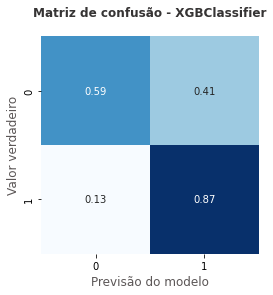

In [76]:
#Plotando matriz de confusão - XGBClassifier

matriz = confusion_matrix(y_test, y_pred, normalize= 'true')
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues')

plt.title('Matriz de confusão - XGBClassifier',
          fontsize = 12,
          color = preto_titulo, 
          pad= 20, 
          fontweight= 'bold')

plt.xlabel('Previsão do modelo',fontsize = 12, color= preto_elementos)
plt.ylabel('Valor verdadeiro'  ,fontsize = 12, color= preto_elementos)

plt.show()

## Random Forest

O algoritmo de Random Forest combina a saída de várias árvores de decisão para alcançar um único resultado. O algoritmo obtém seus resultados com base nas previsões das árvores de decisão que são construídas onde a média da saída das árvores são calculadas chegando assim a um resultado.

Irei treinar o algoritmo da mesma maneira que o anterior apresentado aqui; definindo cada hiperparâmetro e coletando os resultados obtidos, re-instanciando o algoritmo com os melhores parâmetros obtidos e por fim fazendo as previsões.

In [78]:
# *** Definindo os parâmetros *** 

params = {
     'n_estimators': range(100, 500, 50)
}

# *** Instanciando o modelo de Random Forest ***
rf = RandomForestClassifier()

# *** Grid Search ***
resultados_gs = GridSearchCV(rf, scoring="recall", param_grid= params, cv= cv)

# *** Ajuste do modelo ***
resultados_gs.fit(x_train_transformed, y_over_train)

# *** Resultado do Grid Search ***
print("Recall: {}\nPara esta combinação: {}".format(resultados_gs.best_score_, resultados_gs.best_params_))

Recall: 0.8392771084337349
Para esta combinação: {'n_estimators': 450}


In [79]:
# *** Definindo os parâmetros *** 

params = {
     'max_features': ['auto', 'log2', None],
}

# *** Instanciando o modelo de Random Forest ***
rf = RandomForestClassifier(n_estimators = 450)

# *** Grid Search ***
resultados_gs = GridSearchCV(rf, scoring="recall", param_grid= params, cv= cv)

# *** Ajuste do modelo ***
resultados_gs.fit(x_train_transformed, y_over_train)

# *** Resultado do Grid Search ***
print("Recall: {}\nPara esta combinação: {}".format(resultados_gs.best_score_, resultados_gs.best_params_))

Recall: 0.8383132530120481
Para esta combinação: {'max_features': 'log2'}


In [80]:
# *** Definindo os parâmetros *** 

params = {
     'min_samples_split' : range(3,20, 1)
}

# *** Instanciando o modelo de Random Forest ***
rf = RandomForestClassifier(n_estimators = 450, max_features= 'log2')

# *** Grid Search ***
resultados_gs = GridSearchCV(rf, scoring="recall", param_grid= params, cv= cv)

# *** Ajuste do modelo ***
resultados_gs.fit(x_train_transformed, y_over_train)

# *** Resultado do Grid Search ***
print("Recall: {}\nPara esta combinação: {}".format(resultados_gs.best_score_, resultados_gs.best_params_))

Recall: 0.8563855421686748
Para esta combinação: {'min_samples_split': 19}


In [81]:
# *** Definindo os parâmetros *** 

params = {
    'min_samples_leaf' : range(2,20, 1),
}

# *** Instanciando o modelo de Random Forest ***
rf = RandomForestClassifier(n_estimators = 450, max_features= 'log2', min_samples_split= 19)

# *** Grid Search ***
resultados_gs = GridSearchCV(rf, scoring="recall", param_grid= params, cv= cv)

# *** Ajuste do modelo ***
resultados_gs.fit(x_train_transformed, y_over_train)

# *** Resultado do Grid Search ***
print("Recall: {}\nPara esta combinação: {}".format(resultados_gs.best_score_, resultados_gs.best_params_))

Recall: 0.8655421686746987
Para esta combinação: {'min_samples_leaf': 16}


In [82]:
# *** Definindo os parâmetros *** 

params = {
     'criterion' : ["gini", "entropy"]
}

# *** Instanciando o modelo de Random Forest ***
rf = RandomForestClassifier(n_estimators = 450, max_features= 'log2', min_samples_split= 19, min_samples_leaf= 16)

# *** Grid Search ***
resultados_gs = GridSearchCV(rf, scoring="recall", param_grid= params, cv= cv)

# *** Ajuste do modelo ***
resultados_gs.fit(x_train_transformed, y_over_train)

# *** Resultado do Grid Search ***
print("Recall: {}\nPara esta combinação: {}".format(resultados_gs.best_score_, resultados_gs.best_params_))

Recall: 0.8643373493975904
Para esta combinação: {'criterion': 'gini'}


In [83]:
# *** Definindo os parâmetros *** 

params = {
     'max_depth': range(1, 20, 1)
}

# *** Instanciando o modelo de Random Forest ***
rf = RandomForestClassifier(n_estimators = 450, max_features= 'log2', min_samples_split= 19, min_samples_leaf= 16, criterion= 'entropy')

# *** Grid Search ***
resultados_gs = GridSearchCV(rf, scoring="recall", param_grid= params, cv= cv)

# *** Ajuste do modelo ***
resultados_gs.fit(x_train_transformed, y_over_train)

# *** Resultado do Grid Search ***
print("Recall: {}\nPara esta combinação: {}".format(resultados_gs.best_score_, resultados_gs.best_params_))

Recall: 0.8809638554216865
Para esta combinação: {'max_depth': 7}


---
**Resultado - Melhores hiperparâmetros obtidos através do GridSearchCV**

In [84]:
#Instanciando o algoritmo com os melhores hiperparâmetros encontrados

rf = RandomForestClassifier(n_estimators = 450, max_features= 'log2', min_samples_split= 19, min_samples_leaf= 16, criterion= 'entropy', max_depth= 7)

In [85]:
# Exibindo a validação cruzada usando o recall como score

scores = cross_val_score(rf, x_train_transformed, y_over_train, scoring='recall', cv = StratifiedKFold(n_splits= 10, shuffle= True))
print("Recall do modelo pós configuração de hiperparâmetros(GridSearch): {}".format(scores.mean()))

Recall do modelo pós configuração de hiperparâmetros(GridSearch): 0.8812048192771085


---

In [86]:
# Instanciando a pipeline e fazendo o ajuste

pipeline = make_pipeline(ss, rf)
pipeline.fit(X_over_train, y_over_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=7,
                                        max_features='log2',
                                        min_samples_leaf=16,
                                        min_samples_split=19,
                                        n_estimators=450))])

---
*Pipeline* para ajuste do modelo

In [87]:
# Fazendo a previsão com os dados de teste

y_pred = pipeline.predict(X_test)

In [88]:
print('******************** RESUMO DO MODELO - Classification Report ********************\n\n',metrics.classification_report(y_test, y_pred))

******************** RESUMO DO MODELO - Classification Report ********************

               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1024
           1       0.57      0.72      0.64       385

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.78      1409



--- 
**E se novamente for feito o teste de diminuir a profundidade das árvores?**

In [89]:
#Diminuindo para 1 de profundidade

rf = RandomForestClassifier(n_estimators = 350, max_features= 'auto', min_samples_split= 19, min_samples_leaf= 12, criterion= 'entropy', max_depth= 1)

In [90]:
# Exibindo a validação cruzada usando o recall como score

scores = cross_val_score(rf, x_train_transformed, y_over_train, scoring='recall', cv = StratifiedKFold(n_splits= 10, shuffle= True))
print("Recall do modelo pós configuração de hiperparâmetros(GridSearch): {}".format(scores.mean()))

Recall do modelo pós configuração de hiperparâmetros(GridSearch): 0.8378313253012047


In [91]:
# Instanciando a pipeline e fazendo o ajuste

pipeline = make_pipeline(ss, rf)
pipeline.fit(X_over_train, y_over_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=1,
                                        min_samples_leaf=12,
                                        min_samples_split=19,
                                        n_estimators=350))])

In [92]:
# Fazendo a previsão com os dados de teste

y_pred = pipeline.predict(X_test)

In [93]:
print('******************** RESUMO DO MODELO - Classification Report ********************\n\n',metrics.classification_report(y_test, y_pred))

******************** RESUMO DO MODELO - Classification Report ********************

               precision    recall  f1-score   support

           0       0.90      0.66      0.76      1024
           1       0.47      0.80      0.59       385

    accuracy                           0.70      1409
   macro avg       0.69      0.73      0.68      1409
weighted avg       0.78      0.70      0.72      1409



---
Como podemos observar, o recall aumentou consideravelmente de 72% para 80%

## Decision Tree

**Porque treinar uma árvore de decisão depois dos dois algoritmos que já foram treinados anteriormente?**

Como o XGB e a Random Forest usam várias árvores, observei durante a otimização de hiperparâmetros que ao diminuir a profundidade das árvores por meio do parâmetro `max_depth`, o recall aumentava muito a sua porcentagem. Como em um certo ponto as árvores geralmente tem um limite onde ao treiná-las demais sua performance começa a baixar, decidi treinar apenas uma árvore com o algoritmo de *DesicionTree* e ver se consigo aumentar ainda mais o *recall*. A abordagem utilizada é a mesma que foi aplicada nos outros algoritmos, onde faço uma busca inicial com o *RandomizedSeachCV*, uso os parâmetros adquiridos como base para partir pro *GridSearchCV* e assim instancio o modelo com a combinação obtida e finalmente o ajuste.

Com sucesso, o resultado está descrito abaixo:

In [94]:
# Passando alguns parâmetros iniciais para aplicar no RandomizedSearchCV

params_dt = {
    'criterion' : ["gini", "entropy"],
    'min_samples_split' : range(2, 8, 1),
    'min_samples_leaf' : range(2, 8, 1),
    'max_depth': range(1, 5, 1),
    'max_features' : [None,"auto", "sqrt", "log2"]
}

# Instanciando o modelo
dt = DecisionTreeClassifier()

# Instanciando o RandomizedSearchCV e ajustando-o em seguida
resultado_dt = RandomizedSearchCV(dt, param_distributions= params_dt, scoring = 'recall', cv = cv)
resultado_dt.fit(x_train_transformed, y_over_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 5),
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(2, 8),
                                        'min_samples_split': range(2, 8)},
                   scoring='recall')

In [95]:
# DecisionTree

print("Recall: {}\nPara esta combinação: {}".format(resultado_dt.best_score_, resultado_dt.best_params_))

Recall: 0.889879518072289
Para esta combinação: {'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 1, 'criterion': 'entropy'}


---
Usando a mesma abordagem para descobrir os hiperparâmetros. Porém desta vez coloquei todos de uma vez, visto que o tempo de execução é menor do que os algoritmos anteriores.

In [151]:
# *** Definindo os parâmetros ***

params_dt = {
    'min_samples_split': range(2, 4, 1), 
    'min_samples_leaf': range(2, 6, 1), 
    'max_depth': [1, 2, 3], 
    'criterion': ["gini", "entropy"],
    'max_features' : [None,"auto", "sqrt", "log2"]
}

# *** Instanciando o modelo de Random Forest ***
dt = DecisionTreeClassifier()

# *** Grid Search ***
resultados_dt = GridSearchCV(dt, scoring="recall", param_grid= params_dt, cv= cv)

# *** Ajuste do modelo ***
resultados_dt.fit(x_train_transformed, y_over_train)

# *** Resultado do Grid Search ***
print("Melhor: {} para {}".format(resultados_dt.best_score_, resultados_dt.best_params_))

Melhor: 0.9515662650602408 para {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2}


In [165]:
# *** Instanciando o modelo de Random Forest novamente ***
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth= 1, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2, random_state = 26)

---
Coloquei um *seed* (random_state) pois os valores podem mudar durante a execução. Também diminui o parâmetro de `min_samples_leaf` de 3 para 2.

In [166]:
# Exibindo a validação cruzada usando o recall como score

scores = cross_val_score(dt, x_train_transformed, y_over_train, scoring='recall', cv = StratifiedKFold(n_splits= 10, shuffle= True))
print("Recall do modelo pós configuração de hiperparâmetros: {}".format(scores.mean()))

Recall do modelo pós configuração de hiperparâmetros: 0.9850602409638555


In [167]:
# Ajuste do modelo

pipeline = make_pipeline(ss, dt)
pipeline.fit(X_over_train, y_over_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=1,
                                        max_features='auto', min_samples_leaf=2,
                                        random_state=26))])

In [168]:
# Fazendo a previsão com os dados de teste

y_pred = pipeline.predict(X_test)

In [169]:
print('******************** RESUMO DO MODELO - Classification Report ********************\n\n',metrics.classification_report(y_test, y_pred))

******************** RESUMO DO MODELO - Classification Report ********************

               precision    recall  f1-score   support

           0       0.98      0.31      0.47      1024
           1       0.35      0.98      0.51       385

    accuracy                           0.49      1409
   macro avg       0.66      0.64      0.49      1409
weighted avg       0.80      0.49      0.48      1409



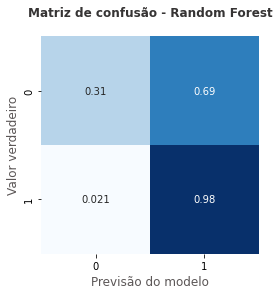

In [170]:
#Plotando matriz de confusão - DecisionTree

matriz = confusion_matrix(y_test, y_pred, normalize= 'true')
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues')

plt.title('Matriz de confusão - Random Forest',
          fontsize = 12,
          color = preto_titulo, 
          pad= 20, 
          fontweight= 'bold')

plt.xlabel('Previsão do modelo',fontsize = 12, color= preto_elementos)
plt.ylabel('Valor verdadeiro'  ,fontsize = 12, color= preto_elementos)

plt.show()

# Conclusão

Depois das análises apresentadas pelo presente projeto, pôde-se constatar alguns problemas em relação a evasão de clientes e mesmo quando a evasão de clientes é menor em alguns meses, ainda sim a receita da empresa não é positiva.

É fato que o custo para obter novos clientes geralmente é maior do que para mantê-los. Um ponto que a empresa peca e que está visivelmente explícito nos gráficos é na alta taxa de cancelamento de clientes com poucos meses contratados. Talvez reformular a estratérgia de marketing, oferecer planos mais direcionados para o perfil mais comum de pessoas que contratam os serviços ou oferecer mais variedades, seja em relação ao tempo (visto que a empresa possui apenas três: mensal, anual, bi-anual) ou em relação a quais pacotes a empresa oferece talvez seja efetivo para mitigar estes problemas.